## Finite State Projection Algorithm
**Stochastic Kinetics of mRNA Molecules in a General Transcription Model**

*Yuntao Lu and Yunxin Zhang*

School of Mathematical Sciences, Fudan University, Shanghai 200433, China

Email: `yuntaolu22@m.fudan.edu.cn` and `xyz@fudan.edu.cn`

This script implements original Finite State Projection (FSP) algorithm (proposed in
`Munsky, B., and M. Khammash, 2006. The Finite State Projection Algorithm for the Solution of the Chemical Master Equation. J. Chem. Phys. 124:044104.`) to study the general transcription model in our paper. The main objective is to time the running times of FSP. The results are plotted in Figure 4 in our paper.

Note that we only time one final execution of `expm_multiply(A * t , p0)`, which calculates the product $\exp{(tA)}p(0)$. Matrix $A$, or equivalently the subset of states, is determined such that the truncation error, defined as $1-\pmb{1}^T\exp{(tA)}p(0)$, is below the prescribed tolerance $\epsilon=1e-5$. Therefore, the preceding iterative process of expanding the state subset (or equivalently the matrix $A$) to achieve this error bound is excluded from the timing. 

In [1]:
import numpy as np
from scipy.sparse import bmat, csr_matrix, block_diag, diags
from scipy.sparse.linalg import expm_multiply

In [2]:
def construct_block_matrix(D0, D1, delta=1, K=10):
    """
    Construct the block matrix:
    
    [ D0^T           delta I                   ]
    [ D1^T   D0^T-delta I    2 delta I         ]
    [        D1^T      D0^T-2delta I   ...     ]
    [               ...             ...        ]
    [                         D1^T  D0^T-10delta I ]

    Parameters:
    - D0, D1: square numpy arrays or sparse matrices (n x n)
    - delta: scalar
    - K: int, the maximum k (example 10 -> 11 blocks)

    Returns:
    - Sparse matrix of size (n*(K+1), n*(K+1))
    """
    n = D0.shape[0]
    if D0.shape != (n, n) or D1.shape != (n, n):
        raise ValueError("D0 and D1 must be square matrices of the same size")
    
    # Transpose once
    D0T = D0.T
    D1T = D1.T

    # List to hold each row of blocks
    blocks = []

    for k in range(K + 1):  # k from 0 to K
        row_blocks = [None] * (K + 1)
        
        # Main diagonal block: D0^T - k * delta * I
        main_block = D0T - k * delta * np.eye(n)
        row_blocks[k] = main_block
        
        # Upper diagonal: (k+1) * delta * I (only if not last row)
        if k < K:
            upper_block = (k + 1) * delta * np.eye(n)
            row_blocks[k + 1] = upper_block
        
        # Lower diagonal: D1^T (only if not first row)
        if k > 0:
            row_blocks[k - 1] = D1T
        
        blocks.append(row_blocks)
    
    # Use bmat to build block matrix
    result = bmat(blocks, format='csr')  # 或 'csc', 'lil' 等
    return result

In [3]:
import Parameters_for_Figures

In [4]:
# D0=Parameters_for_Figures.D0_3a
# D1=Parameters_for_Figures.D1_3a
# D0=Parameters_for_Figures.D0_3b
# D1=Parameters_for_Figures.D1_3b
# D0=Parameters_for_Figures.D0_3c
# D1=Parameters_for_Figures.D1_3c
D0=Parameters_for_Figures.D0_3d
D1=Parameters_for_Figures.D1_3d
delta=1

In [5]:
Block=10
N=D0.shape[0]


A = construct_block_matrix(D0, D1, delta, K=Block)
A=A.toarray()

T = 10

p0 = np.zeros(N * (Block + 1))
p0[0] = 1  


pT = expm_multiply(A * T, p0)

total=np.sum(pT)
print(total)

0.06911292585643788


In [6]:
# print(pT)

In [7]:
tol=1e-5
while total < 1-tol:
    Block+=10
  
    A = construct_block_matrix(D0, D1, delta, K=Block)
    A=A.toarray()
    
    p0 = np.zeros(N * (Block + 1))
    p0[0] = 1 

    # pT is a ndarray of size (N * (Block + 1) , 1)

    pT = expm_multiply(A * T, p0)

    total=np.sum(pT)
    
    print(f"Current Block Number is {Block}; sum of probability is {total}")

print(f"The tolerance is set as {tol} \n Converged with Block Number={Block}\n sum of probability is={total}")

Current Block Number is 20; sum of probability is 0.9969899512692955
Current Block Number is 30; sum of probability is 0.9999999801881084
The tolerance is set as 1e-05 
 Converged with Block Number=30
 sum of probability is=0.9999999801881084


In [8]:
prob=[]
for i in range(Block+1):
    sum_state=np.sum(pT[i*N:i*N+N])
    prob.append(float(sum_state))

In [9]:
# np.save('fig3_FSP_a.npy', prob)
# np.save('fig3_FSP_b.npy', prob)
# np.save('fig3_FSP_c.npy', prob)
np.save('fig3_FSP_d.npy', prob)

In [9]:
print(prob)

[0.009202638018209799, 0.019694656136295563, 0.027391962670660554, 0.03372205349205504, 0.040295015341859794, 0.047527237850968684, 0.055134355920188664, 0.06256932935593784, 0.06918080329732734, 0.07426847278779197, 0.07715894932696374, 0.07733251494966405, 0.07456414833279437, 0.06901537656375235, 0.0612293574056387, 0.052024060421583945, 0.0423208654682117, 0.03296689229663519, 0.024602880404442647, 0.017603211409836582, 0.01208587941711095, 0.00797022864712211, 0.005053819370404172, 0.0030845094940349614, 0.0018139785711280632, 0.0010289978110524483, 0.0005636110388399093, 0.000298373732029047, 0.00015281846607235135, 7.579255633160738e-05, 3.643305087268823e-05, 1.6988067725574447e-05, 7.689612604629034e-06, 3.3811445644345893e-06, 1.444839242807124e-06, 6.000250349483816e-07, 2.4188983114920753e-07, 9.4269661388802e-08, 3.507408223165778e-08, 1.1978299694135631e-08, 3.218451786779735e-09]


In [19]:
import matplotlib.pyplot as plt

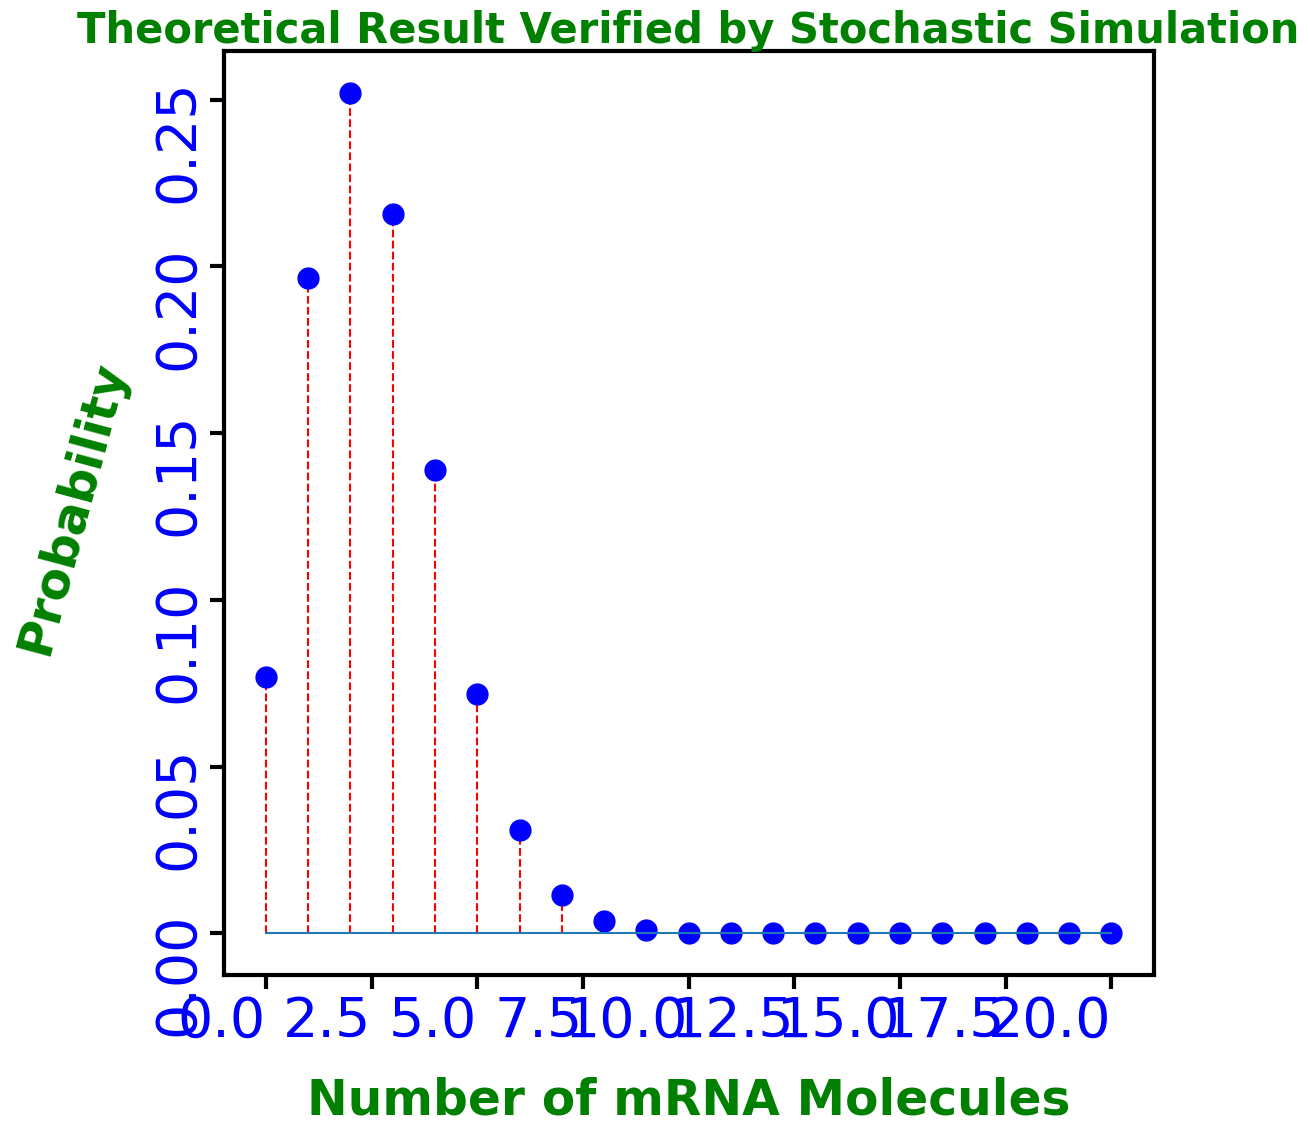

In [20]:
plt.figure(figsize=(12, 12),dpi=100)
plt.rcParams['axes.linewidth'] = 3
# plt.plot(list(range(len(prob))), (np.array(prob)).flatten(),
# color='red', linestyle='--', marker='o', markerfacecolor='blue',
# markeredgecolor='green',linewidth=2,label='Theoretical Result')
plt.stem(list(range(len(prob))), (np.array(prob)).flatten(),linefmt='r--',
         markerfmt='bo',basefmt="",label='Theoretical Result')
plt.setp(plt.gca().get_lines(), markersize=15)
# plt.xlim(0, 40)
# plt.ylim(0, 0.1)
plt.xticks(
    # ticks=list(range(0,45,5)),
           fontsize=40,
           color='blue',
           # fontname='Times New Roman',
           fontname='DejaVu Sans',
           ha='right')
plt.yticks(
    # ticks=np.arange(0.02, 0.12, 0.02),
           fontsize=40,
           color='blue',
           rotation=90,
           # fontname='Times New Roman',
           fontname='DejaVu Sans',
           ha='right')
# plt.title(f'No.{r}Distribution with threshold={threshold},
# end at index {2*index_at_threshold}, sum of prob={s}, d={d}, timing={timing:.2f}s
# \n D0={D0},D1={D1}',fontname='Times New Roman',fontsize=20,fontweight='bold')
plt.title(f'Theoretical Result Verified by Stochastic Simulation',
          # fontname='Times New Roman',
           fontname='DejaVu Sans',
          fontsize=30,fontweight='bold',color='green')
plt.xlabel('Number of mRNA Molecules',fontsize=35,fontweight='bold',
           labelpad=20,
           # fontname='Times New Roman',
           fontname='DejaVu Sans',
           color='green')
plt.ylabel('Probability',fontsize=35,fontweight='bold',
           labelpad=40,
           # fontname='Times New Roman',
           fontname='DejaVu Sans',
           color='green',rotation=75)
plt.tick_params(direction='out',width=3,length=10)
# plt.axhline(0, color='blue', linewidth=2)
# plt.axhline(0, color='blue', linewidth=2)
# from SSA_5_plot import RNAnumber
# plt.hist(RNAnumber,bins=np.arange(-0.5, 41.5, 1), density=True, color='#228B22', edgecolor='green', alpha=0.3,
#              linewidth=2,align='mid',label='Stochastic Simulation')
# plt.legend(loc='upper right', frameon=True, shadow=True, markerscale=2,
#            fancybox=True,prop={'family': 'Times New Roman','size': 40})
# print("Saving figure...")
# plt.savefig('Example2.pdf', format='pdf',edgecolor='black', dpi=800)
plt.show()
# plt.close()